# Vertical Line Test

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

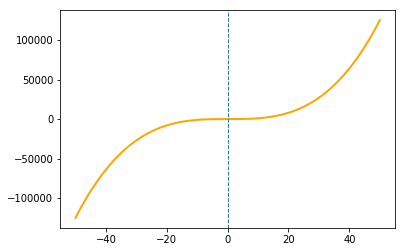

In [11]:
x_vals = np.linspace(-50, 50, 1000)
y_vals = x_vals**3

plt.plot(x_vals, y_vals, linestyle='-', color='orange', linewidth=2)
plt.axvline(x=0, linestyle='--', linewidth=1);

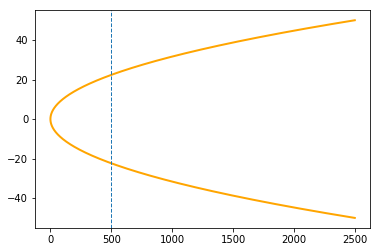

In [10]:
y_vals = np.linspace(-50, 50, 1000)
x_vals = y_vals**2

plt.plot(x_vals, y_vals, linestyle='-', color='orange', linewidth=2)
plt.axvline(x=500, linestyle='--', linewidth=1);

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

If a vertical line passes through two points on a graph, that means a single input(x) is mapped to multiple outputs(y), which is contrary to the definition of a function. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function, because it is the only one without mulitiple output for one input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Function m domain/codomain dimensionality: (3,3) and 
Function n domain/codomain dimensionality: (4,2)

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, the domain value(s) for this function could, for example, be multiplied by separate scalars for each additional dimension.

f(𝑥1,𝑥2)=(x1+x2,x1∗5,x2∗0.5)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix}1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
p(\begin{bmatrix}0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\\
T_p = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

\begin{align}
T_q = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
q(\begin{bmatrix}2 \\ 4 \\ 6\end{bmatrix}) = \begin{bmatrix} 4(2) + 4 + 2(6) \\2(4) - 2 + 3(6) \\ 5(2) - 2(6) + 4  \end{bmatrix} = \begin{bmatrix} 24 \\ 24 \\ 2  \end{bmatrix}
\end{align}

In [12]:
matrix_q = np.array([2,4,6]).reshape(3,1)
matrix_T_q = np.array([4,1,2,-1,2,3,5,1,-2]).reshape(3,3)

np.matmul(matrix_T_q, matrix_q)

array([[24],
       [24],
       [ 2]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

When a linear transformation is applied over a vector space, there is always a vector that is not reoriented in its location and this is the eigenvector. This transformation can cause the eigenvector to shrink or lengthen, and the scalar describing how much the eigenvector was transformed is called the eigenvalue. An eigenvector always has an eigenvalue

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Some of the challenges of working with high dimensional spaces are that: computations are expensive, good visualizations can be hard to create, and data tends to become more sparse with more dimensions.


## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The rule of thumb for P parameters and N observations is:
N≥5P
Or, you dataset (N) should de at least 5 times the number of parameters (P). 

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [26]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [14]:
# Read CSV
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# 1. Separate your data into X (features/independent) and Y (target/dependent) variables.
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = iris['species']

# 2. Center each column at zero by subtracting the mean.
X = X - X.mean()

# 3. Divide each column by its standard deviation. dont really need?
Z = X / X.std()

# 4. Calculate the Variance-Covariance matrix of Z.
covariance_matrix = np.cov(X.T)
print(covariance_matrix)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [29]:
# 5. Calculate the eigenvectors and eigenvalues of the Variance-Covariance matrix.
# 6. Sort the Eigenvalue and Eigenvector pairs.

values, vectors = eig(covariance_matrix)
values, vectors


(array([4.22484077, 0.24224357, 0.07852391, 0.02368303]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

In [33]:
# 7. Use a matrix transformation to project the datapoints onto our eigenvector subspaces.
P = vectors.T.dot(X.T)
print(P)

[[-2.68420713e+00 -2.71539062e+00 -2.88981954e+00 -2.74643720e+00
  -2.72859298e+00 -2.27989736e+00 -2.82089068e+00 -2.62648199e+00
  -2.88795857e+00 -2.67384469e+00 -2.50652679e+00 -2.61314272e+00
  -2.78743398e+00 -3.22520045e+00 -2.64354322e+00 -2.38386932e+00
  -2.62252620e+00 -2.64832273e+00 -2.19907796e+00 -2.58734619e+00
  -2.31053170e+00 -2.54323491e+00 -3.21585769e+00 -2.30312854e+00
  -2.35617109e+00 -2.50791723e+00 -2.46905600e+00 -2.56239095e+00
  -2.63982127e+00 -2.63284791e+00 -2.58846205e+00 -2.41007734e+00
  -2.64763667e+00 -2.59715948e+00 -2.67384469e+00 -2.86699985e+00
  -2.62522846e+00 -2.67384469e+00 -2.98184266e+00 -2.59032303e+00
  -2.77013891e+00 -2.85221108e+00 -2.99829644e+00 -2.40551410e+00
  -2.20883295e+00 -2.71566519e+00 -2.53757337e+00 -2.84032130e+00
  -2.54268576e+00 -2.70391231e+00  1.28479459e+00  9.32410753e-01
   1.46406132e+00  1.80967206e-01  1.08713449e+00  6.40436750e-01
   1.09522371e+00 -7.51467141e-01  1.04329778e+00 -1.01900707e-02
  -5.11086

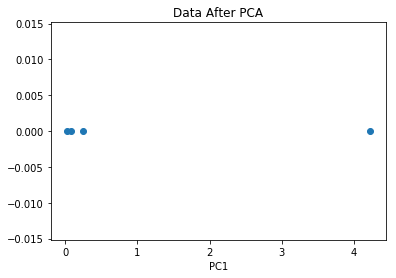

In [31]:
# Plot Principal Component 1
x = values
y = [0,0,0,0]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)